In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
data = np.arange(20).reshape(4,5)
df = pd.DataFrame(data,columns=['a','b','c','d','e'])
df.head()

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [7]:
# 삭제하기
# df2 = df1.drop(0,axis=0) 도 쓸 수 있겠지만...
# 여기서는 인덱스를 사용해 보자.
# :로 범위를 주려면 [], 단건으로 여러 건 입력하려면 [[]]
df1 = df.copy()
df1.drop(df1.index[[1,3]])

,a,b,c,d,e
0,0,1,2,3,4
2,10,11,12,13,14


In [7]:
# 특정 조건에 맞는 인덱스 구하기
df1 = df.copy()
idx = df1[(df1.a>=10) | (df1.a<5)].index
print(idx) # a가 10보다 크거나 같으니까 2,a랑 3,a밖에 없지. 거기다 5보다 작은 것도 포함
df1.drop(idx)

Int64Index([0, 2, 3], dtype='int64')


,a,b,c,d,e
1,5,6,7,8,9


In [8]:
df1[(df1.a>=10) | (df1.a<5)]

,a,b,c,d,e
0,0,1,2,3,4
2,10,11,12,13,14
3,15,16,17,18,19


In [9]:
# [연습문제] data = np.random.randn(10000).reshape(100,100)

In [10]:
data = np.random.randn(10000).reshape(100,100)
col = []
for i in range(100):
    col.append('C'+str(i+1))
index = []
for i in range(100):
    index.append('I'+str(i+1))
df = pd.DataFrame(data,index,col)
df['C2'] = df.C2*100
df.iloc[1] = df.iloc[1]*100
df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100
I1,1.448127,-143.498107,-0.328284,1.326604,-0.080371,0.588265,0.318898,-0.700344,1.361863,0.599120,...,0.552474,-0.501203,-0.594253,-0.588143,-0.787890,1.683752,1.643953,-0.722220,-1.648351,-0.464201
I2,138.189131,211.796472,-102.243332,70.042528,-69.760301,-131.357068,-181.271941,-10.372947,70.399977,109.899580,...,41.147549,-88.663740,4.483098,-4.832267,180.049721,-46.514517,81.949394,28.568233,202.321382,-156.381084
I3,-1.877202,189.251141,-0.561649,-1.131403,-1.341830,-1.447887,1.214144,0.676852,2.071044,-1.291594,...,2.604932,-0.015258,0.111811,0.942969,0.645025,0.202672,-0.167133,-1.128734,0.828411,-1.825988
I4,0.976983,-53.762170,-0.057999,-0.894607,-0.004278,0.845907,1.425013,0.152915,-1.760573,-0.306769,...,1.306607,-0.364313,-0.392096,-0.583666,0.738825,0.335261,0.656485,0.177206,-0.545210,0.998403
I5,1.128150,180.761847,0.050159,-0.191826,-0.980687,-0.538479,-0.746154,-1.066014,-0.693656,1.189870,...,1.078835,0.005984,-1.067469,-0.754563,-0.429801,0.293150,0.712051,-0.133907,1.175943,0.228958


In [11]:
# 일반적인 조건식
df1 = df.copy()
idx = df1[df1.C2 > 100].index
idx

Index(['I2', 'I3', 'I5', 'I14', 'I15', 'I18', 'I23', 'I29', 'I39', 'I42',
       'I59', 'I64', 'I73', 'I84', 'I85', 'I89'],
      dtype='object')

In [12]:
# query(쿼리)를 사용한 조건식
df1 = df.copy()
idx = df1.query('C2 > 100').index
idx

Index(['I2', 'I3', 'I5', 'I14', 'I15', 'I18', 'I23', 'I29', 'I39', 'I42',
       'I59', 'I64', 'I73', 'I84', 'I85', 'I89'],
      dtype='object')

In [13]:
# 조건이 여러 개라면?
df1 = df.copy()
cond1 = df1.C2>100
cond2 = df1.C3>0
cond3 = df1.C4<0
df1[cond1&cond2&cond3]#.index

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100
I5,1.128150,180.761847,0.050159,-0.191826,-0.980687,-0.538479,-0.746154,-1.066014,-0.693656,1.189870,...,1.078835,0.005984,-1.067469,-0.754563,-0.429801,0.293150,0.712051,-0.133907,1.175943,0.228958
I23,-0.430267,198.558954,2.226501,-0.648648,0.939579,0.940542,0.447022,0.518908,-0.743928,-1.338735,...,-0.090458,-1.394984,-0.525533,1.866994,0.346694,0.065451,-0.101943,-0.506970,0.163693,0.796103
I59,-0.255596,108.446067,0.962328,-0.987515,-0.311397,-2.132115,-0.194976,1.043858,0.890769,-0.490425,...,-1.521282,0.476778,2.920052,-1.924177,0.317456,-1.482261,0.209023,-0.336547,-0.139804,0.745933


In [14]:
df1[cond1&cond2|cond3].index # 이렇게 하면 1와 2를 만족하는 애들, 3을 만족하는 애들 이렇게 나옴
# 1을 만족하며 2또는 3을 하려면 2와 3을 ()로 묶어줘야 함

Index(['I3', 'I4', 'I5', 'I8', 'I12', 'I14', 'I16', 'I18', 'I19', 'I22', 'I23',
       'I24', 'I26', 'I27', 'I28', 'I29', 'I30', 'I31', 'I35', 'I36', 'I40',
       'I41', 'I48', 'I50', 'I52', 'I57', 'I58', 'I59', 'I61', 'I64', 'I69',
       'I70', 'I72', 'I73', 'I76', 'I78', 'I82', 'I83', 'I84', 'I85', 'I87',
       'I89', 'I92', 'I93', 'I96', 'I97', 'I99', 'I100'],
      dtype='object')

In [15]:
df1[cond1][['C1','C2']].index

Index(['I2', 'I3', 'I5', 'I14', 'I15', 'I18', 'I23', 'I29', 'I39', 'I42',
       'I59', 'I64', 'I73', 'I84', 'I85', 'I89'],
      dtype='object')

In [8]:
df = sns.load_dataset('titanic')
tdf = df.copy()

In [9]:
# column 이름 변경
tdf.rename(columns={'sex':'gender','fare':'ticket'},inplace=True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
# value_counts (유니크한 값들의 개수 구하기)
# unique(고유값 추출)
print(tdf.gender.value_counts(),'\n')
print(tdf.gender.unique())

male      577
female    314
Name: gender, dtype: int64 

['male' 'female']


In [15]:
# 값 변경
df1 = tdf[['gender']].replace({'female':1,'male':0})
df1.gender.value_counts()

0    577
1    314
Name: gender, dtype: int64

In [20]:
# column 이름을 전부 대/소문자로 변경
tdf.rename(str.upper,axis='columns',inplace=True) # 대문자로~
tdf.rename(str.lower,axis='columns',inplace=True) # 소문자로~
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
# column 순서 변경
# 일단 내 방식대로~

df1 = tdf.copy()
df1.columns = ['pclass','survived', 'gender', 'age', 'sibsp', 'parch', 'ticket',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone']
df1

,pclass,survived,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [22]:
# column 순서 변경
# 선생님의 방식대로~
df1 = tdf.copy()
col_costom=['pclass','gender','age','survived']
df1[col_costom].head()

,pclass,gender,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [23]:
# NaN(Null) 값으로 변경하는 법 + replace 함수 숙지!
df1 = tdf.copy()
# df1['gender'] = np.nan
df1['gender'] = df1.gender.replace('male',np.nan)
df1.gender.value_counts()

female    314
Name: gender, dtype: int64

In [24]:
tdf.info()
# categoty: 범주
# object: 문자열
# bool: boolean

# 알고리즘은 문자 처리 못 함. 전부 숫자로 처리해야 함(인코딩)
# 널 값을 어떻게 처리해야 하는가.
# deck이 이것만 보면 널이 많아서 데이터로서 가치가 있을지 의심스럽지만...
# 중복인 열을 지우거나 통합하기
# 밸류 카운츠로 중복처럼 보이는 애들 들여다보고 통합할지 말지 결정하면 됨

# 쓸모 없는 것들 삭제, 중복되는 거 삭제, family 만들어서 alone과 비교한 후 삭제

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   gender       891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   ticket       891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [25]:
print(tdf.pclass.value_counts(),'\n')
print(tdf.value_counts('class'),'\n') # 카테고리(범주형) 컬럼이라 이렇게 출력
# 이걸 봤을 때 값이 결국 같다는 걸 알 수 있음. 그럼 하나 지워버리면 됨

3    491
1    216
2    184
Name: pclass, dtype: int64 

class
Third     491
First     216
Second    184
dtype: int64 



In [26]:
print(tdf.survived.value_counts(),'\n')
print(tdf.alive.value_counts(),'\n')

0    549
1    342
Name: survived, dtype: int64 

no     549
yes    342
Name: alive, dtype: int64 



In [27]:
print(tdf.gender.value_counts(),'\n')
print(tdf.who.value_counts(),'\n')

male      577
female    314
Name: gender, dtype: int64 

man      537
woman    271
child     83
Name: who, dtype: int64 



In [28]:
print(tdf.embarked.value_counts(),'\n')
print(tdf.embark_town.value_counts(),'\n')

S    644
C    168
Q     77
Name: embarked, dtype: int64 

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64 



In [29]:
# age 결측값 채워넣기 - fillna
tdf1 = tdf.copy()
print(tdf.age.isnull().sum(),'\n')
tdf1.age.fillna(tdf1.age.mean(),inplace=True) # age의 평균값을 NaN에 반영
print(tdf1.age.isnull().sum())

# 근데 일단 이건 이런 식으로 대체한다~ 하는 것만 알아두고
# 실질적인 밸류 선정은 나중에 내가 궁리해서 채우면 됨

177 

0


In [30]:
tdf1 = tdf.copy()
tdf1.age.replace(np.nan,tdf1.age.mean(),inplace=True)
tdf1.age.isnull().sum()

0

In [17]:
# 결측값을 아예 삭제하는 법
tdf2 = tdf.copy()
tdf2.dropna(subset=['age'],inplace=True)
print(len(tdf2),'\n') # 결측값 삭제한 만큼 행의 개수는 줄어든다
tdf2.age.isnull().sum()

714 



0

In [32]:
#tdf2.drop(['embark_town','who','class'],axis=1,inplace=True)
#tdf2.drop(['alive','alone','deck'],axis=1,inplace=True)

In [18]:
# 실수를 정수로 변환하여 출력하기
tdf2[['age','ticket']].astype(int).head() # 널값 있으면 astype 동작 안 함.

,age,ticket
0,22,7
1,38,71
2,26,7
3,35,53
4,35,8


In [19]:
# 혹은 딕셔너리로 작성해서 한꺼번에 여러 타입으로 변환도 가능하다!
tdf1 = tdf2[['age','ticket']].astype({'age':'int','ticket':'float'})
tdf1.head()

,age,ticket
0,22,7.2500
1,38,71.2833
2,26,7.9250
3,35,53.1000
4,35,8.0500


In [35]:
# age의 column의 값 구성 체크
tdf2.age.astype(int).value_counts()

24    31
22    27
28    27
30    27
18    26
      ..
66     1
53     1
80     1
12     1
74     1
Name: age, Length: 71, dtype: int64

In [36]:
# age 칼럼의 고유 구성 요소
tdf.age.unique() # 이건 NaN 있다

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [37]:
# age 칼럼의 범주화 - 유니크로 보니 구성요소가 너무 많더라!
# 이렇게 의미있는 데이터로 가공하는 사람이 피쳐 엔지니어

def get_category(age):
    cat=''
    if age<=5: cat='Baby'
    elif age<=12:cat='Child'
    elif age<=19:cat='Teenager'
    elif age<=35:cat='Young Adult'
    elif age<=60:cat='Adult'
    else:cat='Eldery'
    return cat
tdf2['age_cat']=tdf2.age.apply(lambda x:get_category(x))
tdf2['age_cat']
tdf2.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Young Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Young Adult


In [38]:
!pip install scikit-learn

In [39]:
# 인코딩
df1 = df.copy()
df2 = df1[['sex','class']]
df2.head()

,sex,class
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third


In [20]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

df1 = df.copy()
le = LabelEncoder() # 이건 약칭이 아니라 객체를 따로 만든 거임
features = ['sex','class']
for feature in features:
    df1[feature] = le.fit_transform(df1[feature])
df2 = df1[['sex','class']]
df2.head()

# 숫자의 크기에 민감한 회귀 예측에선 쓸 수 없고
# 범주로 되어 있는 곳(숫자 크기에는 상관 없는 곳)에는 라벨인코딩 쓸 수 있음
# 범주형에서 문자를 숫자로 인코딩하고 싶을 때 레이블 인코딩!

,sex,class
0,1,2
1,0,0
2,0,2
3,0,0
4,1,2


In [34]:
# 라벨 인코더 생성
encoder = LabelEncoder()
X_train = np.array(['PC', 'MOBILE', 'PC'    ])
X_test  = np.array(['PC', 'TABLET', 'MOBILE']) # X_test에만 TABLET 데이터가 있음

# X_train데이터를 이용 피팅하고 라벨숫자로 변환한다
encoder.fit(X_train) # 준비운동. 물론 이걸 한꺼번에 fit_transform으로 처리할 수도 있다
X_train_encoded = encoder.transform(X_train)

# X_test데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가한다 (중요!!!)
for label in np.unique(X_test):
    if label not in encoder.classes_: # unseen label 데이터인 경우( )
        encoder.classes_ = np.append(encoder.classes_, label) # 미처리 시 ValueError발생
X_test_encoded = encoder.transform(X_test)

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1 = df[['sex','class']]
#df1.sex = le.fit_transform(df1.sex)
#df1['class'] = le.fit_transform(df1['class'])
for i in df1.columns:
    df1[i] = le.fit_transform(df1[i])
df1
# 어려울 거 전혀 없고~
# 1. 라벨 인코더를 객체화 시켜서 쓰기 편하게 한다
# 2. 각 칼럼에 대해 객체.fit_transform(df.col) 시킨 것을 적용한다
# 3. 수치화 된 칼럼을 감상한다. 끝!
# 번외: 칼럼이 불어나지는 않기 때문에 고유값이 많을수록 등장 숫자도 늘어난다.

,sex,class
0,1,2
1,0,0
2,0,2
3,0,0
4,1,2
...,...,...
886,1,1
887,0,0
888,0,2
889,1,0


In [49]:
from sklearn.preprocessing import OneHotEncoder
df1 = df.copy()
cli = list(df1['class'])
a = le.fit_transform(cli).reshape(-1,1)
b = pd.DataFrame(oh.fit_transform(a).toarray())
b
# 어렵게 여기지 말구~
# 1. 범주화 하고 싶은 열을 리스트화 한다.
# 2. 그걸 LabelEncoder로 수치화한 다음 n행 1열 배열로 바꾼다.
# 3. 그걸 OneHotEncoder에 집어넣고, 배열화한 걸 데이터프레임으로 바꿔서 본체에 병합하면 끝

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,1.0,0.0
887,1.0,0.0,0.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [41]:
# OneHot Encoding
# 레이블 인코딩을 통해 문자를 숫자로 바꾼 다음 사용할 수 있다
from sklearn.preprocessing import OneHotEncoder
df1 = df.copy()
items = list(df1.sex)
encoder = LabelEncoder() # 아까처럼 객체 이름 le로 해도 상관은 없음
encoder.fit(items) # 여기서 통일만 해준다면 말야
# fit은 준비단계
labels = encoder.transform(items) # 문자 리스트인 걸 레이블 인코더를 통해 숫자로 바꿔줬어
# print(items,labels) # 결과로 만든 걸 보려면 여기서
labels = labels.reshape(-1,1) # 1차원 리스트를 2차원 배열로 만들되, 1개의 열만 가지려면?
# 열의 개수는 아는데 행의 개수를 몰라. 그럼 알아서 계산하게 해야겠지? 그럴 때 쓰는 게 -1!
ohencode = OneHotEncoder()
ohlabel = ohencode.fit_transform(labels)
print(ohlabel.toarray(),ohlabel.shape)
# 요소가 2개였기(female, male) 때문에 컬럼도 2개임.
# 칼럼이 자꾸 뿔어나기 때문에 좋다고 하긴 힘들다
# 최종적으로 희소행렬 형태가 됨(0 또는 1, 해당되는 컬럼값에 1이 들어감)
# 아마 알파벳 순서대로 순서가 매겨질 듯

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]] (891, 2)


In [42]:
df2 = df1[['sex','class']]
pd.get_dummies(df2).head() # 요소값을 컬럼으로 올려서 값은 숫자로 출력
# 요소가 0, 1이라는 단순 값으로만 나오기 때문에 숫자의 크기도 크게 중요하지 않아짐
# 회귀분석에서도 쓸 수 있다!

,sex_female,sex_male,class_First,class_Second,class_Third
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,1,0,0
4,0,1,0,0,1


In [53]:
from sklearn.datasets import load_boston
# 보스턴 주택 가격에 대한 데이터임
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [54]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [55]:
bst = pd.DataFrame(boston.data,columns=[boston.feature_names])
# 이거 대괄호로 묶어줘야 각 칼럼이 시리즈가 아니라 데이터프레임으로 분류돼서 나중에 스케일링 가능해짐
# 몇몇 변수들이 칼럼에 빠져있으니 추가해 주자
bst['TARGET'] = boston.target
bst.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [56]:
bdf = bst[['INDUS','RM','PTRATIO','LSTAT','TARGET']]
bdf.head()

,INDUS,RM,PTRATIO,LSTAT,TARGET
0,2.31,6.575,15.3,4.98,24.0
1,7.07,6.421,17.8,9.14,21.6
2,7.07,7.185,17.8,4.03,34.7
3,2.18,6.998,18.7,2.94,33.4
4,2.18,7.147,18.7,5.33,36.2


In [57]:
# 스케일링, 정규화
# 칼럼 간의 단위가 다르기 때문에 정규화 해줘서
# 0과 1 사이의 상대적 근사값으로 바꿔주면
# 단위가 다르더라도 칼럼 간의 값 비교는 가능해지지
from sklearn.preprocessing import MinMaxScaler # 최소 0, 최대 1로 스케일링 해주는 도구

scaler = MinMaxScaler()
bdf['RM'] = scaler.fit_transform(bdf.RM) # fit 준비한 후 transform 변환 실행!
# 1차원을 fit에 집어넣어서 안 먹히나봄.
bdf['INDUS'] = scaler.fit_transform(bdf.INDUS)

li = ['INDUS','RM','PTRATIO','LSTAT','TARGET']
for col in li:
    bdf[col] = scaler.fit_transform(bdf[col])
bdf.head()

,INDUS,RM,PTRATIO,LSTAT,TARGET
0,0.067815,0.577505,0.287234,0.089680,0.422222
1,0.242302,0.547998,0.553191,0.204470,0.368889
2,0.242302,0.694386,0.553191,0.063466,0.660000
3,0.063050,0.658555,0.648936,0.033389,0.631111
4,0.063050,0.687105,0.648936,0.099338,0.693333


In [58]:
# corr() - 각 변수 간의 상관관계. 범위는 -1~1
# 가장 역으로 가면 -1, 1에 가까울수록 비슷한 관계, 0일수록 무관함
# 참고로 1은 변수 본인 그 자체
# -1에 가까우면 작동은 반대로 하지만 관계성은 크다는 뜻이 된다
bdf.corr()

,INDUS,RM,PTRATIO,LSTAT,TARGET
INDUS,1.000000,-0.391676,0.383248,0.603800,-0.483725
RM,-0.391676,1.000000,-0.355501,-0.613808,0.695360
PTRATIO,0.383248,-0.355501,1.000000,0.374044,-0.507787
LSTAT,0.603800,-0.613808,0.374044,1.000000,-0.737663
TARGET,-0.483725,0.695360,-0.507787,-0.737663,1.000000


<AxesSubplot:xlabel='None', ylabel='None'>

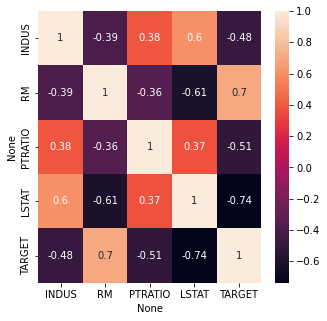

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(bdf.corr(),annot=True)

<AxesSubplot:ylabel='Density'>

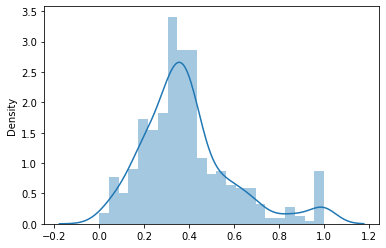

In [54]:
sns.distplot(bdf[['TARGET']])

우리가 하는 건 모수통계. 모집단을 추측하는 것<br>
모집단이 정규분포이면 표본도 정규분표여야 우리가 추정을 잘 할 수 있지.<br>
근데 현실 데이터는 정규분포가 아닌 경우가 대부분<br>
최대한 정규분포가 되게끔 데이터를 변환해 주어야 추정할 수 있다<br>

<AxesSubplot:ylabel='Density'>

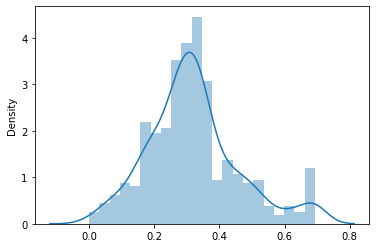

In [55]:
# 로그 변환 - 스케일링만으로는 명확하지 않았던 것을 제대로 변환해 보자!
bdf['TARGET'] = np.log1p(bdf.TARGET)
sns.distplot(bdf['TARGET'])
# 조금 더 나아진 것을 볼 수 있다

In [56]:
bdf.head()

,INDUS,RM,PTRATIO,LSTAT,TARGET
0,0.067815,0.577505,0.287234,0.089680,0.352221
1,0.242302,0.547998,0.553191,0.204470,0.313999
2,0.242302,0.694386,0.553191,0.063466,0.506818
3,0.063050,0.658555,0.648936,0.033389,0.489261
4,0.063050,0.687105,0.648936,0.099338,0.526699


In [57]:
# 로그 변환을 다시 환원해 보자
bdf['TARGET'] = np.expm1(bdf.TARGET)
bdf.head()

,INDUS,RM,PTRATIO,LSTAT,TARGET
0,0.067815,0.577505,0.287234,0.089680,0.422222
1,0.242302,0.547998,0.553191,0.204470,0.368889
2,0.242302,0.694386,0.553191,0.063466,0.660000
3,0.063050,0.658555,0.648936,0.033389,0.631111
4,0.063050,0.687105,0.648936,0.099338,0.693333


In [65]:
# 결합
data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)

df1 = pd.DataFrame(data1,columns = ['a','b','c','d','e'])
df2 = pd.DataFrame(data2,columns = ['d','e','h','i'])
print(df1,'\n')
print(df2,'\n')

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30 



In [66]:
# 행 방향 결합
pd.concat([df1,df2],axis=0) # 사실 디폴트가 0이라 axis=0 생략해도 됨

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
0,NaN,NaN,NaN,11,12,13.0,14.0
1,NaN,NaN,NaN,15,16,17.0,18.0
2,NaN,NaN,NaN,19,20,21.0,22.0
3,NaN,NaN,NaN,23,24,25.0,26.0
4,NaN,NaN,NaN,27,28,29.0,30.0


In [67]:
# 열 방향 결합
pd.concat([df1,df2],axis=1)

,a,b,c,d,e,d,e,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [71]:
pd.concat([df1,df2]).reset_index()

,index,a,b,c,d,e,h,i
0,0,1.0,2.0,3.0,4,5,NaN,NaN
1,1,6.0,7.0,8.0,9,10,NaN,NaN
2,2,11.0,12.0,13.0,14,15,NaN,NaN
3,3,16.0,17.0,18.0,19,20,NaN,NaN
4,0,NaN,NaN,NaN,11,12,13.0,14.0
5,1,NaN,NaN,NaN,15,16,17.0,18.0
6,2,NaN,NaN,NaN,19,20,21.0,22.0
7,3,NaN,NaN,NaN,23,24,25.0,26.0
8,4,NaN,NaN,NaN,27,28,29.0,30.0


In [68]:
# 인덱스 예쁘게 나타내보자
pd.concat([df1,df2],axis=0,ignore_index=True)

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
4,NaN,NaN,NaN,11,12,13.0,14.0
5,NaN,NaN,NaN,15,16,17.0,18.0
6,NaN,NaN,NaN,19,20,21.0,22.0
7,NaN,NaN,NaN,23,24,25.0,26.0
8,NaN,NaN,NaN,27,28,29.0,30.0


In [62]:
# 중복 칼럼에 좌측, 우측 구분하여 표기해 주기
# 인덱스 기준으로 합치는 것임
# join 교집합
df1.join(df2,lsuffix='_a',rsuffix='_b') # inner가 숨겨져 있다

,a,b,c,d_a,e_a,d_b,e_b,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [63]:
# join 합집합
df1.join(df2,lsuffix='_a',rsuffix='_b',how='outer')

,a,b,c,d_a,e_a,d_b,e_b,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [64]:
df1['ind'] = [1,2,3,4]
df2['ind'] = 1,2,3,4,5

df1.set_index('ind').join(df2.set_index('ind'),lsuffix='_a',rsuffix='_b',how='outer')

,a,b,c,d_a,e_a,d_b,e_b,h,i
ind,,,,,,,,,
1,1.0,2.0,3.0,4.0,5.0,11,12,13,14
2,6.0,7.0,8.0,9.0,10.0,15,16,17,18
3,11.0,12.0,13.0,14.0,15.0,19,20,21,22
4,16.0,17.0,18.0,19.0,20.0,23,24,25,26
5,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [74]:
a = pd.DataFrame(np.arange(12).reshape(3,4))
b = pd.DataFrame(np.random.randint(1,30,20).reshape(4,5))
a.join(b,lsuffix='m', rsuffix='n',how='outer')

,0m,1m,2m,3m,0n,1n,2n,3n,4
0,0.0,1.0,2.0,3.0,2,4,19,1,27
1,4.0,5.0,6.0,7.0,16,5,18,14,7
2,8.0,9.0,10.0,11.0,27,6,7,16,17
3,NaN,NaN,NaN,NaN,12,7,19,28,29


In [75]:
a.join(b,lsuffix='a',rsuffix='b')

,0a,1a,2a,3a,0b,1b,2b,3b,4
0,0,1,2,3,2,4,19,1,27
1,4,5,6,7,16,5,18,14,7
2,8,9,10,11,27,6,7,16,17


In [80]:
pd.merge(a,b,on=2,how='outer')

,0_x,1_x,2,3_x,0_y,1_y,3_y,4
0,0.0,1.0,2,3.0,NaN,NaN,NaN,NaN
1,4.0,5.0,6,7.0,NaN,NaN,NaN,NaN
2,8.0,9.0,10,11.0,NaN,NaN,NaN,NaN
3,NaN,NaN,19,NaN,2.0,4.0,1.0,27.0
4,NaN,NaN,19,NaN,12.0,7.0,28.0,29.0
5,NaN,NaN,18,NaN,16.0,5.0,14.0,7.0
6,NaN,NaN,7,NaN,27.0,6.0,16.0,17.0


In [65]:
# 특정 컬럼을 기준으로
pd.merge(df1,df2,on='ind',how='outer')
# ind 칼럼을 기준으로 합집합 생성

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1.0,2.0,3.0,4.0,5.0,1,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,2,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,3,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,4,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,5,27,28,29,30


In [66]:
pd.merge(df1,df2,on='ind')

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1,2,3,4,5,1,11,12,13,14
1,6,7,8,9,10,2,15,16,17,18
2,11,12,13,14,15,3,19,20,21,22
3,16,17,18,19,20,4,23,24,25,26


In [67]:
df = pd.read_csv('./dataset/mtcars.csv',index_col=0)
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [72]:
# [과제] mtcars.csv를 불러와서 0~1 스케일로 정규화한 후
# qsec 컬럼이 0.5보다 큰 관측치의 개수를 구하시오.
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('./dataset/mtcars.csv',index_col=0)

scaler = MinMaxScaler()

scaled = scaler.fit_transform(df)
print(type(scaled))  # 이거 배열로 바뀌었다!!! 민맥스 스케일 쓰면 배열로 바뀜
df = pd.DataFrame(scaled,columns=df.columns) # 배열로 바뀌었기 때문에 새로 데이터프레임화 시켰음
print(len(df.loc[df['qsec']>0.5,['qsec']]))  # 행 조건, 열 조건 하나씩 걸어줬음

#display(scaler.fit_transform(df))

#for i in [df.columns]:
#    df[i] = scaler.fit_transform(df[i]) # fit 들어가는 건 2차원 배열로 수행해야 함
# 이건 한줄씩 뽑아서 대체한 거기 때문에 새로 데이터프레임화 시켜줄 필요 없음
    
#print(len(df[df['qsec']>0.5])) # df.value_counts(df['qsec'>0.5])로도 수행 가능
#display(df)

<class 'numpy.ndarray'>
9


In [ ]:
#